# https://www.youtube.com/watch?v=m1XvMtK-6BY - Tutorial source

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

### Data importing

In [4]:
df = pd.read_csv(r"C:\Users\Asus\Desktop\Data Analytics\Python\DataSets For Cleaning\tv_shows.csv", index_col = [1])

### Exploration and cleaning

In [5]:
df.drop("Unnamed: 0", axis=1, inplace= True) #fixing index

In [6]:
df.head(5)

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [7]:
df.dtypes

Title              object
Year                int64
Age                object
IMDb               object
Rotten Tomatoes    object
Netflix             int64
Hulu                int64
Prime Video         int64
Disney+             int64
Type                int64
dtype: object

In [8]:
df["IMDb"] = df["IMDb"].str.rstrip("/100") #fixing /100 and converting to float

In [9]:
df["IMDb"] = df["IMDb"].astype(float)

In [10]:
df.describe()

,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type
count,5368.000000,4406.000000,5368.000000,5368.000000,5368.000000,5368.000000,5368.0
mean,2012.628726,7.076260,0.367176,0.301975,0.341095,0.065387,1.0
std,10.142813,1.114313,0.482080,0.459157,0.474122,0.247231,0.0
min,1904.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,2011.000000,6.500000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2016.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0
75%,2018.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0
max,2021.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0


In [11]:
df.isnull() #checking for null values

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
5713,False,False,True,True,False,False,False,False,False,False
5714,False,False,True,True,False,False,False,False,False,False
5715,False,False,True,True,False,False,False,False,False,False


In [12]:
df.dropna(axis = 0, how = "any", inplace = True ) #removing rows with NaN values

In [13]:
df.dtypes #making Age column as integer

Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object

In [14]:
df["Age"] = df["Age"].str.rstrip("+")

In [15]:
df["Age"] = df["Age"].replace("all", 0)

In [16]:
df["Age"] = df["Age"].astype("int") #converting to int

In [17]:
df.rename(columns = {"Age":"Minimum Age"}, inplace = True) #renaming column age to minimum age

#### Fixing Rotten Tomatoes data type to integer

In [18]:
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].str.rstrip("/100") #fixing /100 and converting to float

In [19]:
print(df["Rotten Tomatoes"] == "") #fixing the first row being empty and not having rating = 100

ID
1        True
2       False
3       False
4       False
5       False
        ...  
5684    False
5687    False
5688    False
5690    False
5691    False
Name: Rotten Tomatoes, Length: 3207, dtype: bool


In [20]:
df.loc[1, "Rotten Tomatoes"] = df.loc[1, "Rotten Tomatoes"] + "100"

In [21]:
df.index[df["Rotten Tomatoes"] == ""] #looking for the " " value that I want to change

Int64Index([1960], dtype='int64', name='ID')

In [22]:
df.loc[df["Rotten Tomatoes"] == ""]

,Title,Year,Minimum Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
1960,Rick and Morty,2013,18,9.2,,0,1,0,0,1


In [23]:
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].replace("", 94) #replacing " " with 94

In [24]:
df.loc[df["Rotten Tomatoes"] == ""]

,Title,Year,Minimum Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,


In [25]:
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].astype(int)

In [26]:
df.dtypes

Title               object
Year                 int64
Minimum Age          int32
IMDb               float64
Rotten Tomatoes      int32
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object

In [27]:
df["Rotten Tomatoes"].describe()

count    3207.000000
mean       47.446211
std        24.173012
min         3.000000
25%        38.000000
50%        53.000000
75%        64.000000
max       100.000000
Name: Rotten Tomatoes, dtype: float64

# Question 1: What are the top 10 rated movies in Rotten Tomatoes?

In [28]:
df.sort_values("Rotten Tomatoes", ascending = False).head(10)

,Title,Year,Minimum Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18,9.4,100,1,0,0,0,1
2,Stranger Things,2016,16,8.7,96,1,0,0,0,1
3,Attack on Titan,2013,18,9.0,95,1,1,0,0,1
5376,Loki,2021,16,8.5,95,0,0,0,1,1
5377,The Mandalorian,2019,16,8.8,94,0,0,0,1,1
4,Better Call Saul,2015,18,8.8,94,1,0,0,0,1
1960,Rick and Morty,2013,18,9.2,94,0,1,0,0,1
3581,The Boys,2019,18,8.7,93,0,0,1,0,1
1962,Seinfeld,1989,16,8.8,93,0,1,0,0,1


# Question 2: What are the top 10 rated movies in IMDb

In [29]:
df.sort_values("IMDb", ascending = False).head(10)

,Title,Year,Minimum Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
5401,Bluey,2018,0,9.6,7,0,0,0,1,1
4054,The Secret World of Nature: Spain,2020,7,9.6,5,0,0,1,0,1
3818,Malgudi Days,1987,0,9.5,62,0,0,1,0,1
1,Breaking Bad,2008,18,9.4,100,1,0,0,0,1
2034,Cosmos,2014,0,9.3,82,0,1,1,1,1
81,Our Planet,2019,0,9.3,82,1,0,0,0,1
6,Avatar: The Last Airbender,2005,7,9.3,93,1,0,1,0,1
3668,Clarkson's Farm,2021,7,9.2,76,0,0,1,0,1
5435,Cosmos: Possible Worlds,2020,7,9.2,62,0,0,0,1,1


# Question 3: How many movies have a 18+ restriciton?

In [30]:
(df["Minimum Age"] == 18).sum()

852

# Question 4: How many movies were made in 2010 and have an IMDb rating >=5


In [31]:
((df["Year"] == 2010) & (df["IMDb"] >= 5)).sum()

98

# How many age categories are there?

In [32]:
df["Minimum Age"].unique()

array([18, 16,  7,  0, 13])

In [33]:
AgeGroups = df.groupby("Minimum Age")["Title"].count()
AgeGroups

Minimum Age
0     535
7     824
13      9
16    987
18    852
Name: Title, dtype: int64

# Graphing the data

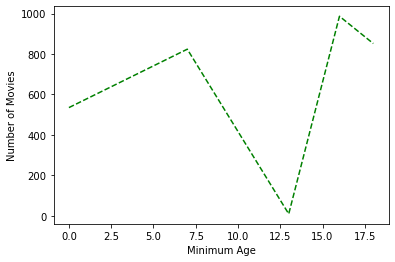

In [34]:
plt.plot(AgeGroups, "g--")
plt.xlabel("Minimum Age")
plt.ylabel("Number of Movies")
plt.show()

# Question 6: Graph number of movies categorized by age restrictions before 2000 and after 2000?

In [35]:
YearGroups = df["Year"].unique()
YearGroups

array([2008, 2016, 2013, 2015, 2017, 2005, 2010, 2011, 2020, 2009, 2019,
       2018, 2014, 2003, 2021, 1987, 2006, 1999, 2012, 2000, 1966, 1995,
       2002, 1969, 1993, 1997, 2004, 2007, 2001, 1996, 1998, 1986, 1994,
       1984, 1983, 1981, 1989, 1992, 1990, 1959, 1982, 1991, 1972, 1975,
       1985, 1988, 1951, 1978, 1955, 1977, 1964, 1970, 1961, 1934, 1963,
       1971, 1973, 1967, 1960, 1962, 1976, 1980, 1974, 1952, 1968, 1965,
       1954, 1979, 1957, 1958], dtype=int64)

In [36]:
Before2000 = df[(df["Year"] < 2000)]
Before2000

,Title,Year,Minimum Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
41,Star Trek: The Next Generation,1987,7,8.6,86,1,1,1,0,1
55,One Piece,1999,7,8.8,85,1,1,0,0,1
85,Star Trek,1966,7,8.3,82,1,1,1,0,1
92,Neon Genesis Evangelion,1995,16,8.5,82,1,0,0,0,1
97,Monty Python's Flying Circus,1969,16,8.8,8,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5566,Spin and Marty,1955,0,8.0,47,0,0,0,1,1
5568,Bonkers,1993,0,6.8,47,0,0,0,1,1
5586,Adventures in Wonderland,1992,7,8.0,46,0,0,0,1,1


In [37]:
After2000 = df[(df["Year"] >= 2000)]
After2000

,Title,Year,Minimum Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
1,Breaking Bad,2008,18,9.4,100,1,0,0,0,1
2,Stranger Things,2016,16,8.7,96,1,0,0,0,1
3,Attack on Titan,2013,18,9.0,95,1,1,0,0,1
4,Better Call Saul,2015,18,8.8,94,1,0,0,0,1
5,Dark,2017,16,8.8,93,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5684,Disney Family Sundays,2019,0,5.6,3,0,0,0,1,1
5687,Wild Chile,2018,7,7.5,3,0,0,0,1,1
5688,Howie Mandel's Animals Doing Things,2018,0,3.2,3,0,0,0,1,1


In [38]:
MoviesBefore2000 = Before2000.groupby("Minimum Age")["Title"].count()
MoviesBefore2000

Minimum Age
0     103
7     132
13      1
16     58
18     19
Name: Title, dtype: int64

In [39]:
MoviesAfter2000 = After2000.groupby("Minimum Age")["Title"].count()
MoviesAfter2000

Minimum Age
0     432
7     692
13      8
16    929
18    833
Name: Title, dtype: int64

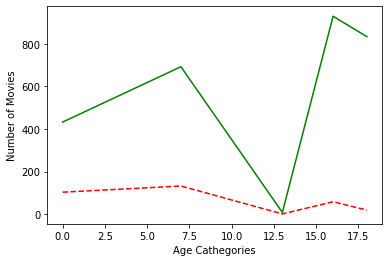

In [40]:
plt.plot(MoviesBefore2000, "r--")
plt.plot(MoviesAfter2000, "g")
plt.xlabel("Age Cathegories")
plt.ylabel("Number of Movies")
plt.show()